In [1]:
# Imports
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as RMSE
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
import seaborn as sns

import pandas as pd

In [2]:
accidents = pd.read_csv('../../data/MA3_finished.csv', index_col='ID')

In [3]:
accidents.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Year,Month,Day,Hour,Duration
count,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06
mean,3.525778e+06,2.202578e+00,3.618415e+01,-9.457055e+01,5.685456e-01,6.186961e+01,6.441538e+01,2.951444e+01,9.107071e+00,7.691129e+00,2.020027e+03,6.685881e+00,2.599904e+00,1.242746e+01,2.694761e+04
std,2.035609e+06,4.802376e-01,5.122709e+00,1.730333e+01,1.764164e+00,1.904205e+01,2.275718e+01,1.014852e+00,2.642265e+00,5.412225e+00,1.864212e+00,3.639135e+00,1.805649e+00,5.428667e+00,8.166324e+05
min,0.000000e+00,1.000000e+00,2.455480e+01,-1.246238e+02,0.000000e+00,-4.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.200000e+02
25%,1.762889e+06,2.000000e+00,3.329151e+01,-1.171585e+02,0.000000e+00,4.900000e+01,4.800000e+01,2.934000e+01,1.000000e+01,4.600000e+00,2.019000e+03,3.000000e+00,1.000000e+00,8.000000e+00,2.068000e+03
50%,3.525778e+06,2.000000e+00,3.581709e+01,-8.767776e+01,3.700000e-02,6.400000e+01,6.700000e+01,2.984000e+01,1.000000e+01,7.000000e+00,2.020000e+03,7.000000e+00,3.000000e+00,1.300000e+01,4.502000e+03
75%,5.288666e+06,2.000000e+00,4.011675e+01,-8.036947e+01,4.780000e-01,7.600000e+01,8.400000e+01,3.002000e+01,1.000000e+01,1.040000e+01,2.022000e+03,1.000000e+01,4.000000e+00,1.700000e+01,7.539000e+03
max,7.051555e+06,4.000000e+00,4.900220e+01,-6.711317e+01,4.417500e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,2.023000e+03,1.200000e+01,6.000000e+00,2.300000e+01,1.687763e+08


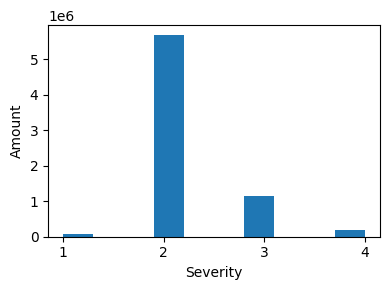

In [4]:
plt.figure(figsize=(4, 3))
plt.hist(accidents['Severity'])
plt.xlabel('Severity')
plt.ylabel('Amount')
plt.xticks(range(int(accidents['Severity'].min()), int(accidents['Severity'].max()) + 1))
plt.tight_layout()

In [5]:
#featureselection
#features to encode
obj_bool_features = accidents[['Division','Region','State Name','Astronomical_Twilight','Nautical_Twilight','Civil_Twilight',
                               'Sunrise_Sunset','Weather_Condition','Sunrise_Sunset','Airport_Code','Timezone','Country','Zipcode',
                               'State','County', 'City' ,'Street','Description','Start_Time', 'End_Time', 'Weather_Condition', 
                               'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
                               'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset']]

#encode features above
le = LabelEncoder()
#create copy of df
accidents_encoded = pd.DataFrame()
#LabelEncoder can only encode one column at a time --> forloop
#obj_bool_feat = le.fit_transform(obj_bool_features)
for features in obj_bool_features:
    accidents_encoded[features] = le.fit_transform(accidents[features])

#float/int features
float_int_features = accidents[['Severity','Start_Lng', 'Start_Lat', 'Temperature(F)', 'Humidity(%)', 
                                'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',]]

for features in float_int_features:
    accidents_encoded[features] = accidents[features]

#check if combination worked 
accidents_encoded.columns

Index(['Division', 'Region', 'State Name', 'Astronomical_Twilight',
       'Nautical_Twilight', 'Civil_Twilight', 'Sunrise_Sunset',
       'Weather_Condition', 'Airport_Code', 'Timezone', 'Country', 'Zipcode',
       'State', 'County', 'City', 'Street', 'Description', 'Start_Time',
       'End_Time', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Severity',
       'Start_Lng', 'Start_Lat', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)'],
      dtype='object')

In [6]:
#features = accidents[['Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
#                         'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]

features = accidents_encoded.drop(columns=['Severity'])
#target         
target = accidents_encoded['Severity']

#scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
#(80/20 split)
features_train, features_test, target_train, target_test = train_test_split(features_scaled, target)
#weiteraufteiler
features_train, features_dev, target_train, target_dev = train_test_split(features_train, target_train)

print(len(features_train), len(features_dev), len(features_test))

3966500 1322167 1762889


In [8]:
#Model trainieren
clf = LinearRegression()
clf.fit(features_train, target_train)

LinearRegression()

In [9]:
print(clf.intercept_, clf.coef_)

2.2028209505598215 [-1.33148909e-02  6.51044049e-03 -2.81893432e-02  2.84733949e-05
  6.19993304e-03  3.44387149e-03  3.02958816e-03  5.00889004e-03
  1.35048331e-03 -1.72337610e-02 -6.24500451e-17  3.56867982e-02
  9.98992808e-03 -2.03834998e-02 -3.76447231e-03 -1.98093807e-03
  5.83208890e-02 -2.46650298e-01  9.42072875e-02 -4.87468395e-03
 -1.45509946e-03 -2.89066059e-02  9.59844430e-04  8.28139421e-03
 -1.30991127e-03  4.19538953e-03 -9.02427632e-04 -9.40095440e-03
 -1.57806035e-02  1.31479183e-03 -4.52891928e-02 -2.60208521e-17
  6.10445329e-02  3.62669280e-02  7.64839255e-03  8.93777415e-05
 -1.17475046e-02 -7.02630845e-04  2.57340528e-03]


In [10]:
#Vorhersage
predicted = clf.predict(features_dev)
expected = target_dev

print('RMSE: ')
RMSE(expected, predicted)

RMSE: 


0.20319363776932023

In [ ]:
poly = PolynomialFeatures(2)
features_train_polynom = poly.fit_transform(features_train)
features_dev_polynom = poly.fit_transform(features_dev)

In [ ]:
clf.fit(features_train_polynom, target_train)

predicted = clf.predict(features_dev_polynom)
expected = target_dev

print('RMSE: ')
RMSE(expected, predicted)

In [ ]:
features.describe()

In [ ]:
accidents['Severity'].head()

In [ ]:
features.hist(figsize=(10,10), bins=30)
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
features_of_interest=['Temperature(F)', 'Humidity(%)']
accidents[features_of_interest].describe()

In [ ]:
sns.scatterplot(
    data = accidents,
    x = 'Start_Lng',
    y = 'Start_Lat',
    size = 'Severity',
    hue = 'Severity',
    palette = 'viridis',
    alpha = 0.5,
)
